In [3]:
!pip install opendatasets

In [5]:
import opendatasets as od
od.download('https://www.kaggle.com/datasets/kritikseth/fruit-and-vegetable-image-recognition?select=train')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: gaurav065
Your Kaggle Key: ··········


100%|██████████| 1.98G/1.98G [00:20<00:00, 106MB/s] 


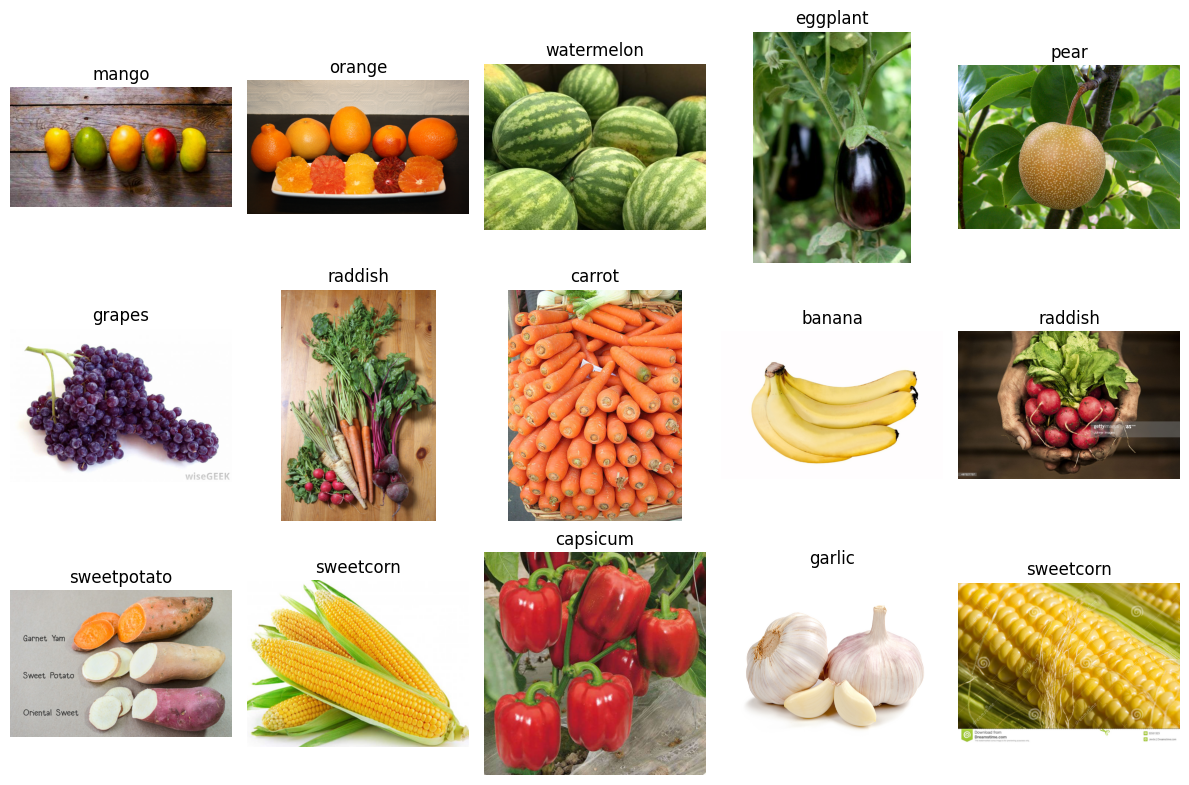

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import glob
import os

# Specify the path to your image directory
image_dir = '/content/fruit-and-vegetable-image-recognition/train'

# Retrieve all image paths recursively from the directory
image_paths = glob.glob(image_dir + '/**/*.jpg', recursive=True)

# Select a subset of images to display
num_images = 15
selected_images = np.random.choice(image_paths, num_images, replace=False)

# Create a grid plot to display the images
rows = 3  # Number of rows in the grid
cols = 5  # Number of columns in the grid
fig, axes = plt.subplots(rows, cols, figsize=(12, 8))

# Iterate over the selected images and display them on the grid
for i, image_path in enumerate(selected_images):
    row = i // cols
    col = i % cols
    img = plt.imread(image_path)
    axes[row, col].imshow(img)
    axes[row, col].axis('off')

    # Extract the subfolder name from the image path
    subfolder = os.path.basename(os.path.dirname(image_path))

    # Set the subfolder name as the subplot title
    axes[row, col].set_title(subfolder)

# Adjust the spacing between subplots and display the plot
plt.tight_layout()
plt.show()


# Splitting and Making the Training testing and validation directories using the tensorflow keras version of image handling

In [7]:
train_dir = "/content/fruit-and-vegetable-image-recognition/train"
test_dir = "/content/fruit-and-vegetable-image-recognition/test"
validation_dir = "/content/fruit-and-vegetable-image-recognition/validation"

In [14]:
training_set = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                               seed=2509,
                                                               image_size=(224, 224),
                                                              batch_size=32)
validation_set = tf.keras.preprocessing.image_dataset_from_directory(validation_dir,
                                                              seed=2509,
                                                              image_size=(224, 224),
                                                              shuffle=False,
                                                              batch_size=32)

Found 3115 files belonging to 36 classes.
Found 351 files belonging to 36 classes.


In [17]:
classes = training_set.class_names
print(classes)
print(len(classes
        ))

['apple', 'banana', 'beetroot', 'bell pepper', 'cabbage', 'capsicum', 'carrot', 'cauliflower', 'chilli pepper', 'corn', 'cucumber', 'eggplant', 'garlic', 'ginger', 'grapes', 'jalepeno', 'kiwi', 'lemon', 'lettuce', 'mango', 'onion', 'orange', 'paprika', 'pear', 'peas', 'pineapple', 'pomegranate', 'potato', 'raddish', 'soy beans', 'spinach', 'sweetcorn', 'sweetpotato', 'tomato', 'turnip', 'watermelon']
36


# Using a Cnn architecture

In [41]:
from keras import Model
from keras import optimizers
import tensorflow as tf
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import MaxPooling2D, Conv2D, Dense, Flatten, Dropout, BatchNormalization


model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(len(classes),activation='softmax'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_35 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 batch_normalization_25 (Bat  (None, 111, 111, 32)     128       
 chNormalization)                                                
                                                                 
 conv2d_36 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                      

In [42]:
from tensorflow.keras.callbacks import Callback, ModelCheckpoint
from google.colab import files

# class DownloadWeightsCallback(Callback):
#     def __init__(self, weights_file):
#         super(DownloadWeightsCallback, self).__init__()
#         self.weights_file = weights_file

#     def on_epoch_end(self, epoch, logs=None):
#         if epoch > 4:
#             # Download the weights file after each epoch
#             files.download(self.weights_file.format(epoch=epoch))

# Create a ModelCheckpoint callback to save the weights
checkpoint_callback = ModelCheckpoint('weights.{epoch:02d}.h5', save_weights_only=True)

# Create the custom callback to download the weights
# download_weights_callback = DownloadWeightsCallback('weights.{epoch:02d}.h5')

# Compile and train your model
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(), optimizer = tf.keras.optimizers.Adam(learning_rate=0.001), metrics = ["accuracy"])

# model.fit(training_set, validation_data = validation_set, epochs=25, callbacks=[checkpoint_callback, download_weights_callback])

In [31]:
# from google.colab import drive
# drive.mount('/content/drive/')

Mounted at /content/drive/


In [32]:
# model.load_weights('/content/drive/MyDrive/Weights/Food Project/Fruits and vegetable identification Weights/weights.13.h5')

In [43]:
model.fit(training_set, validation_data = validation_set, epochs=25, callbacks=[checkpoint_callback])

Epoch 1/25
98/98 [==============================] - 117s 667ms/step - loss: 3.0403 - accuracy: 0.1817 - val_loss: 2.4634 - val_accuracy: 0.2764
Epoch 2/25
98/98 [==============================] - 72s 680ms/step - loss: 2.2080 - accuracy: 0.3628 - val_loss: 2.1423 - val_accuracy: 0.4046
Epoch 3/25
98/98 [==============================] - 74s 704ms/step - loss: 1.8348 - accuracy: 0.4520 - val_loss: 1.3488 - val_accuracy: 0.6011
Epoch 4/25
98/98 [==============================] - 70s 677ms/step - loss: 1.5595 - accuracy: 0.5300 - val_loss: 1.2967 - val_accuracy: 0.6353
Epoch 5/25
98/98 [==============================] - 71s 689ms/step - loss: 1.3535 - accuracy: 0.5756 - val_loss: 0.8322 - val_accuracy: 0.7464
Epoch 6/25
98/98 [==============================] - 71s 688ms/step - loss: 1.1750 - accuracy: 0.6440 - val_loss: 0.6411 - val_accuracy: 0.8376
Epoch 7/25
98/98 [==============================] - 71s 686ms/step - loss: 0.9378 - accuracy: 0.7175 - val_loss: 0.6786 - val_accuracy: 0.797

In [44]:
model.load_weights('/content/weights.25.h5')

In [45]:
model.fit(training_set, validation_data = validation_set, epochs=10, callbacks=[checkpoint_callback])

Epoch 1/10
98/98 [==============================] - 73s 702ms/step - loss: 0.1090 - accuracy: 0.9628 - val_loss: 0.3335 - val_accuracy: 0.9430
Epoch 2/10
98/98 [==============================] - 73s 689ms/step - loss: 0.1433 - accuracy: 0.9583 - val_loss: 0.3577 - val_accuracy: 0.9288
Epoch 3/10
98/98 [==============================] - 72s 698ms/step - loss: 0.1470 - accuracy: 0.9522 - val_loss: 0.6187 - val_accuracy: 0.8575
Epoch 4/10
98/98 [==============================] - 72s 696ms/step - loss: 0.1709 - accuracy: 0.9441 - val_loss: 0.3641 - val_accuracy: 0.9516
Epoch 5/10
98/98 [==============================] - 72s 692ms/step - loss: 0.1364 - accuracy: 0.9551 - val_loss: 0.2797 - val_accuracy: 0.9573
Epoch 6/10
98/98 [==============================] - 72s 691ms/step - loss: 0.1133 - accuracy: 0.9637 - val_loss: 0.3381 - val_accuracy: 0.9544
Epoch 7/10
98/98 [==============================] - 75s 707ms/step - loss: 0.1280 - accuracy: 0.9621 - val_loss: 0.3204 - val_accuracy: 0.9459